In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from acquire import get_iris_data
from prep_iris import prep_iris_data
iris_prep = prep_iris_data(get_iris_data())
iris_prep.sample(15)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
148,149,6.2,3.4,5.4,2.3,virginica,2
111,112,6.4,2.7,5.3,1.9,virginica,2
130,131,7.4,2.8,6.1,1.9,virginica,2
28,29,5.2,3.4,1.4,0.2,setosa,0
37,38,4.9,3.6,1.4,0.1,setosa,0
145,146,6.7,3.0,5.2,2.3,virginica,2
146,147,6.3,2.5,5.0,1.9,virginica,2
46,47,5.1,3.8,1.6,0.2,setosa,0
96,97,5.7,2.9,4.2,1.3,versicolor,1
103,104,6.3,2.9,5.6,1.8,virginica,2


# Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [3]:
iris_prep.isnull().sum()

measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species           0
species_enc       0
dtype: int64

In [4]:
train, test = train_test_split(iris_prep, test_size=0.3, random_state=123, stratify=iris_prep[['species']])

In [5]:
train.shape

(105, 7)

In [6]:
test.shape

(45, 7)

In [7]:
train_percent = (train.shape[0] / (train.shape[0] + test.shape[0]))
train_percent

0.7

# Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. What are your takeaways from this visualization?

In [8]:
train.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species', 'species_enc'],
      dtype='object')

In [14]:
y_df = train[['measurement_id','species']]
y_df.shape

(105, 2)

In [10]:
train_to_melt = train.drop(['species', 'species_enc'], axis=1)
train_to_melt.shape

(105, 5)

In [27]:
train_to_melt.sample(15)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width
82,83,5.8,2.7,3.9,1.2
14,15,5.8,4.0,1.2,0.2
24,25,4.8,3.4,1.9,0.2
133,134,6.3,2.8,5.1,1.5
141,142,6.9,3.1,5.1,2.3
92,93,5.8,2.6,4.0,1.2
15,16,5.7,4.4,1.5,0.4
8,9,4.4,2.9,1.4,0.2
59,60,5.2,2.7,3.9,1.4
7,8,5.0,3.4,1.5,0.2


In [30]:
# Melting train set.

melt = pd.melt(train_to_melt, id_vars=['measurement_id'], var_name='measurement_type', value_name='measurement_value')

melt.sample(20)

,measurement_id,measurement_type,measurement_value
367,1,petal_width,0.2
215,150,petal_length,5.1
279,80,petal_length,3.5
261,141,petal_length,5.6
372,121,petal_width,2.3
154,129,sepal_width,2.8
243,85,petal_length,4.5
117,109,sepal_width,2.5
83,60,sepal_length,5.2
210,61,petal_length,3.5


In [15]:
melted_trained_joined = pd.merge(melt, y_df, on=['measurement_id'])
melted_trained_joined.sample(20)

,measurement_id,measurement_type,measurement_value,species
161,70,sepal_width,2.5,versicolor
254,110,petal_length,6.1,virginica
285,137,sepal_width,3.4,virginica
347,50,petal_width,0.2,setosa
323,122,petal_width,2.0,virginica
19,7,petal_width,0.3,setosa
400,59,sepal_length,6.6,versicolor
320,122,sepal_length,5.6,virginica
97,11,sepal_width,3.7,setosa
114,105,petal_length,5.8,virginica


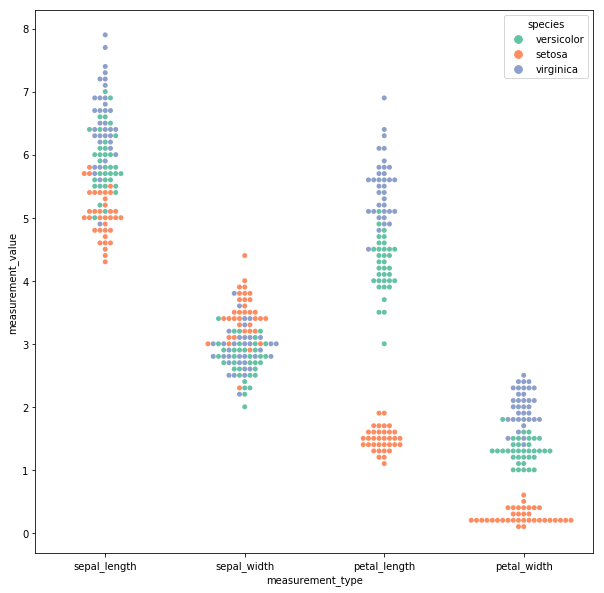

In [29]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='measurement_type', y='measurement_value', data=melted_trained_joined, hue='species', palette="Set2")

# Create 4 subplots (2 rows x 2 columns) of scatterplots
- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

In [17]:
train['sepal_area'] = train['sepal_length'] * train['sepal_width']
train['petal_area'] = train['petal_length'] * train['petal_width']
train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,species_enc,sepal_area,petal_area
60,61,5.0,2.0,3.5,1.0,versicolor,1,10.00,3.50
16,17,5.4,3.9,1.3,0.4,setosa,0,21.06,0.52
88,89,5.6,3.0,4.1,1.3,versicolor,1,16.80,5.33
130,131,7.4,2.8,6.1,1.9,virginica,2,20.72,11.59
6,7,4.6,3.4,1.4,0.3,setosa,0,15.64,0.42


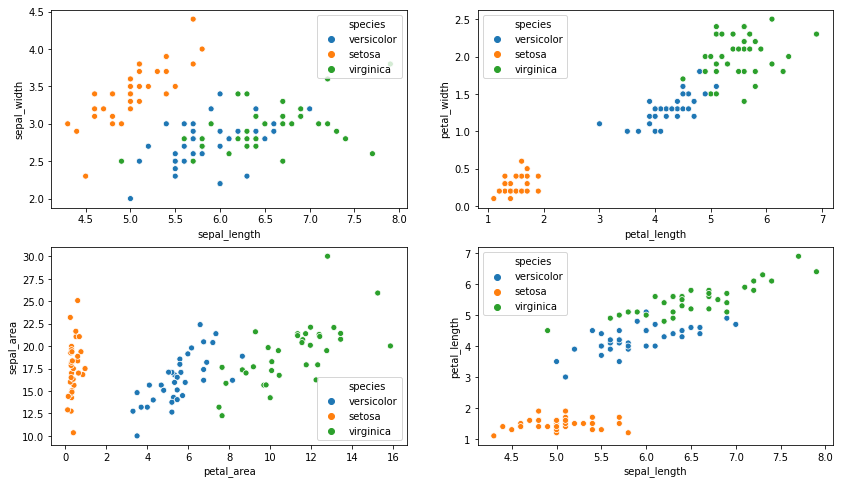

In [18]:
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.scatterplot(x='sepal_length', y='sepal_width', data=train, hue='species')
plt.subplot(222)
sns.scatterplot(x='petal_length', y='petal_width', data=train, hue='species')
plt.subplot(223)
sns.scatterplot(x='petal_area', y='sepal_area', data=train, hue='species')
plt.subplot(224)
sns.scatterplot(x='sepal_length', y='petal_length', data=train, hue='species')


# Create a heatmap of each variable layering correlation coefficient on top.

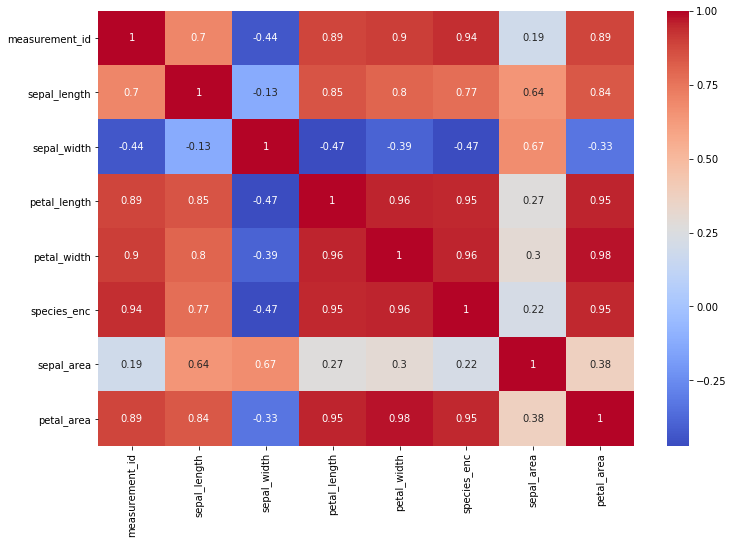

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)

# Create a scatter matrix visualizing the interaction of each variable

In [20]:
train.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species', 'species_enc', 'sepal_area', 'petal_area'],
      dtype='object')

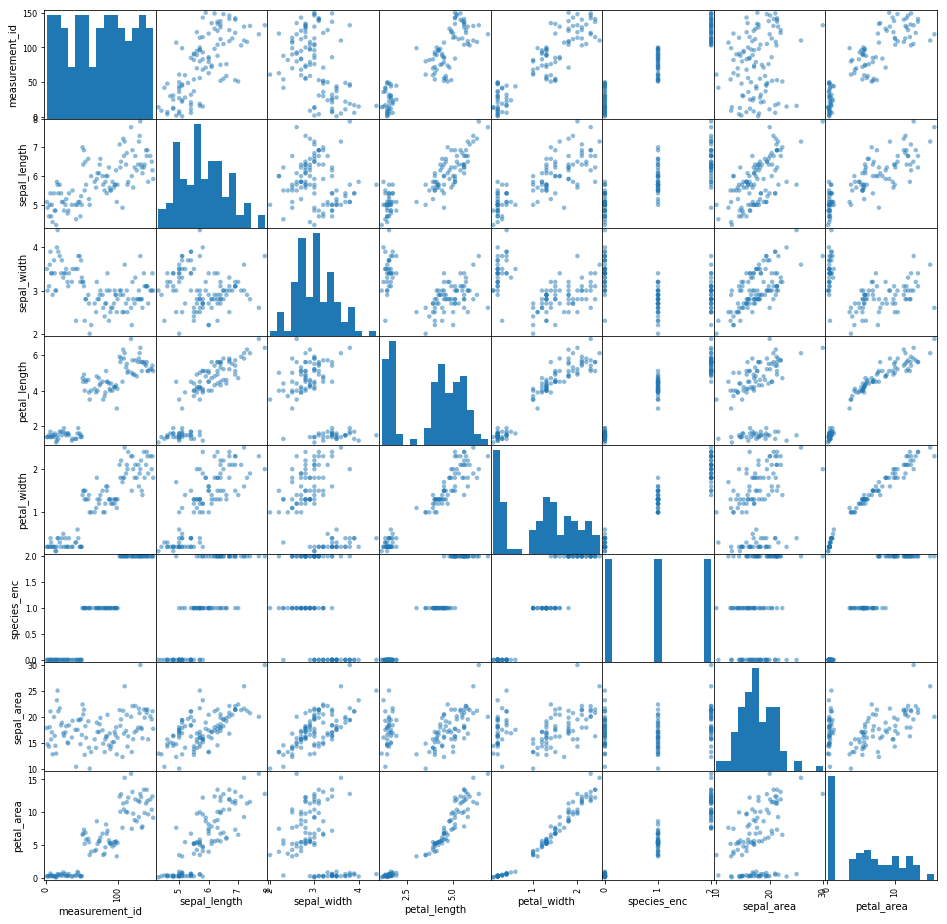

In [22]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train[['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_enc', 'sepal_area', 'petal_area']], marker='o', s=20,
    hist_kwds={'bins':15},  figsize=(16,16), cmap=cmap)

# Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.
- must include null hypothesis, alternative hyp, t-test, results, summary

- $H_1$: Virginica has a significantly higher petal length than versicolor.
- $H_0$: Virginica does not have a significantly higher petal length than versicolor.

# Checking correlation between petal length vs species.

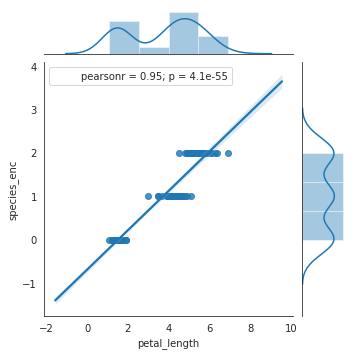

In [25]:
import scipy.stats as stats
from scipy.stats import pearsonr
with sns.axes_style('white'):
    j = sns.jointplot("petal_length", "species_enc", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()